In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
ab_bind = pd.read_table("../data/AB-Bind-Database-master/AB-Bind_experimental_data.csv",engine='python',sep=',')
ab_bind.shape

(1101, 16)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1274bc2e8>]],
      dtype=object)

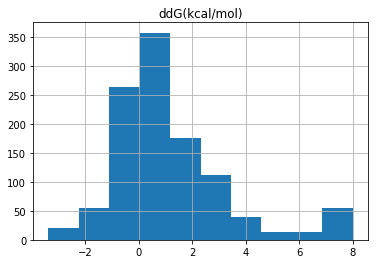

In [19]:
ab_bind.hist(column="ddG(kcal/mol)")

In [20]:
single_point_mutants = (ab_bind['Mutation'].str.split(',').str.len() == 1)
no_homology_models = (-ab_bind['#PDB'].str.startswith('HM'))

In [22]:
ab_bind_filtered = ab_bind.loc[no_homology_models&single_point_mutants].copy()
ab_bind_filtered.shape

(558, 16)

In [23]:
ab_bind_filtered.rename(columns={'Partners(A_B)':'partners','ddG(kcal/mol)':'ddG'},inplace=True)

In [24]:
ab_bind_filtered['mutant'] = ab_bind_filtered['Mutation'].str.split(':',expand=True)[1]
ab_bind_filtered['chain'] = ab_bind_filtered['Mutation'].str.split(':',expand=True)[0]
ab_bind_filtered['pdb_mutation'] = ab_bind_filtered['#PDB']+'.'+ab_bind_filtered['mutant']

In [25]:
ab_bind_filtered.head()

,#PDB,partners,Protein-1,Protein-2,Mutation,ddG,PDB Res. (Angstroms),PDB R-value,PDB R-free,PDB pH,PDB T (K),PDB MolProbity clashscore,PDB DOI,Assay Name,Assay pH,Assay Temp (Celcius),mutant,chain,pdb_mutation
1,1AK4,A_D,huCyc-A,HIV-1 CAPSID (N-Term),D:A488G,2.49,2.36,0.238,0.306,7,100,4.71,10.1016/S0092-8674(00)81823-1,SPR,6.5,NaN,A488G,D,1AK4.A488G
2,1AK4,A_D,huCyc-A,HIV-1 CAPSID (N-Term),D:A488V,0.60,2.36,0.238,0.306,7,100,4.71,10.1016/S0092-8674(00)81823-1,SPR,6.5,NaN,A488V,D,1AK4.A488V
3,1AK4,A_D,huCyc-A,HIV-1 CAPSID (N-Term),D:A492G,0.41,2.36,0.238,0.306,7,100,4.71,10.1016/S0092-8674(00)81823-1,SPR,6.5,NaN,A492G,D,1AK4.A492G
4,1AK4,A_D,huCyc-A,HIV-1 CAPSID (N-Term),D:A492V,0.19,2.36,0.238,0.306,7,100,4.71,10.1016/S0092-8674(00)81823-1,SPR,6.5,NaN,A492V,D,1AK4.A492V
5,1AK4,A_D,huCyc-A,HIV-1 CAPSID (N-Term),D:G489A,1.91,2.36,0.238,0.306,7,100,4.71,10.1016/S0092-8674(00)81823-1,SPR,6.5,NaN,G489A,D,1AK4.G489A


In [26]:
ab_bind_filtered.drop_duplicates(subset=['chain','pdb_mutation'],keep='last',inplace=True)

In [27]:
ab_bind_filtered.shape

(555, 19)

In [28]:
ab_bind_filtered.to_csv('../data/ab_bind_filtered_2020.csv')